# Movie_DataQuest - Search For The Best Single Factor

In [43]:
# Dependencies
import pandas as pd
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.stats import linregress
import random
import numpy as np
from config import api_key_txt
#from config import tmdb_api_key

### Project description and outline:

Description: How do various movie characteristics affect movie success?

Definition of Success:  Total U.S. Box Office Receipts

Characteristics Considered: 
  - Genre
  - Run time
  - Budget
  - Critical reviews
  - User reviews
  - Awards / nominations
  - MPAA Rating

Hypothesis: The closer box office receipts correlate with the various movie characteristics, 
the stronger the influence of the given characteristic on movie success.



### Steve's Code Goes Here

### Introduction to IMDb Database Preperation   
Movie Data Sets Utilized:  Internet Movie Database (IMDb) & Online Media Database (OMDb).

The IMDb contains a greater range of quantified movie characteristics than does the OMDb.  For 
this reason the IMDb was used to provide the bulk of our testing criteria.  In order to limit 
the scope of the data we pulled only information regarding movies that were feature-length, 
non-"adult", and were released between 2000 and 2019.


In [ ]:
### INITIAL DATA SET ###

# Our first data set is a CSV of film data derived from the data available at https://www.imdb.com/interfaces/. 
# It contains feature-length films released between 2000 and 2019.

# Importing this CSV as a dataframe

imdb_csv = "Resources/trimmed_IMDB_data.csv"
imdb_df = pd.read_csv(imdb_csv, encoding="UTF-8")

imdb_df

In [ ]:
### REFINING DATA SET ###

# Our IMDB data contains hundreds of thousands of movies, many of which had no theatrical release.
# We will combine this data with data constructed from https://movielens.org/, which focuses on released films.

# Importing movielens CSV as a dataframe

movielens_csv = "Resources/movielens_links.csv"
movielens_df =  pd.read_csv(movielens_csv, encoding="UTF-8")

movielens_df

In [ ]:
# Combining the dataframes to find films that are in both

# Renaming themovielens_df "imdbTTID" column to match our imdb_df

movielens_df = movielens_df.rename(columns={"imdbTTID": "tconst"})

# Merging dataframes

big_df = imdb_df.merge(movielens_df, how="inner")

big_df


In [ ]:
### GETTING ADDITIONAL DATA FROM TMDB ###

# Selecting a sample of films for the TMDB API call

# Assigning random number
for index, row in big_df.iterrows():
    random.seed(index)
    big_df.loc[index, "randomNumber"] = random.random()

In [ ]:
# Sorting by random number to randomize
big_df = big_df.sort_values("randomNumber")

# Trimming to 5,000 entries

smaller_df = pd.DataFrame(big_df[:5000])

smaller_df

In [ ]:
# Pulling additional data via a TMDB API call

# Setting base URL
url = "https://api.themoviedb.org/3/movie/"

# Looping through dataframe
for index, row in smaller_df.iterrows():
    movie_id = row["tmdbId"]
    
    full_url = url + str(movie_id) + "?api_key=" + tmdb_api_key
    movie_data = requests.get(full_url).json()

#Setting up error handling and adding data to dataframe

    try:
        smaller_df.loc[index, "Budget"] = movie_data["budget"]
    except:
        smaller_df.loc[index, "Budget"] = "N/A"
        
    try:
        smaller_df.loc[index, "Box Office"] = movie_data["revenue"]
    except:
        smaller_df.loc[index, "Box Office"] = "N/A"
    
smaller_df

In [ ]:
### TRIMMING DATA FOR OMDB API CALLS ###

# Trimming dataframe to only items with Box Office data

boxoffice_df = smaller_df[smaller_df["Box Office"] != "N/A"]
boxoffice_df = boxoffice_df[boxoffice_df["Box Office"] != 0.0]

# Recasting Budget and Box Office as integers

boxoffice_df[['Budget', 'Box Office']] = boxoffice_df[['Budget', 'Box Office']].astype(int)

# Replacing missing values with Nan

boxoffice_df.replace(0, np.nan, inplace=True)

boxoffice_df

In [ ]:
# Reducing to 900 items

sample_df = pd.DataFrame(boxoffice_df[:900])

# Exporting as CSV to preserve data between uses

sample_df.to_csv("Resources/sample.csv",index=False)

In [44]:
# Importing new dataframe from CSV to preserve data between uses

omdb_csv = "Resources/sample.csv"
omdb_api_df = pd.read_csv(omdb_csv, encoding="UTF-8")

omdb_api_df

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,movieId,imdbId,tmdbId,randomNumber,Budget,Box Office
0,tt6768578,Dogman,Dogman,2018,103,"Crime,Drama,Thriller",188675,6768578,483184.0,0.000094,NaN,5080147
1,tt1637706,Our Idiot Brother,Our Idiot Brother,2011,90,"Comedy,Drama",88672,1637706,59968.0,0.000106,5000000.0,24816118
2,tt1486185,Red Riding Hood,Red Riding Hood,2011,100,"Fantasy,Horror,Mystery",85397,1486185,49730.0,0.000177,42000000.0,89162162
3,tt1373243,Tarif Novogodniy,Tarif Novogodniy,2008,83,"Comedy,Fantasy,Romance",171549,1373243,50530.0,0.000196,3200000.0,3877492
4,tt0337879,Blackball,Blackball,2003,96,"Comedy,Drama,Sport",32128,337879,15443.0,0.000279,NaN,48000
...,...,...,...,...,...,...,...,...,...,...,...,...
895,tt1347007,Hidden,Skjult,2009,95,"Horror,Thriller",144412,1347007,24821.0,0.133336,2215773.0,1489526
896,tt0195714,Final Destination,Final Destination,2000,98,"Horror,Thriller",3409,195714,9532.0,0.133878,23000000.0,112880294
897,tt1457767,The Conjuring,The Conjuring,2013,112,"Horror,Mystery,Thriller",103688,1457767,138843.0,0.133941,13000000.0,319494638
898,tt0280486,Bad Company,Bad Company,2002,116,"Action,Comedy,Thriller",5414,280486,3132.0,0.134483,70000000.0,65977295


#### Conclusion/Segway
The size of the IMDb data set was....   And contained Genre, Run time, Budget, Critical Reviews, User Review, Awards/Nominations and MPAA Ratings.

After the database was acquired and cleaned it was merged with a sample of movies from the OM

### Jim's Code Goes Here

## OMDB Preparation:
    
Although the IMDb does not contain some of the movie characteristics we wished to test, it does contain
the box office information required for our analysis.  We will take a 900 movie sample from the IMDb and
merge it with matching movie information in the OMDb database to form the basis of our analysis.

In [45]:
# # Get a list of IMDB ids 
movie_ids = omdb_api_df['tconst'].tolist()
movie_ids

['tt6768578',
 'tt1637706',
 'tt1486185',
 'tt1373243',
 'tt0337879',
 'tt1375666',
 'tt9795368',
 'tt1446714',
 'tt2345759',
 'tt0324127',
 'tt0247638',
 'tt4044364',
 'tt4291600',
 'tt0342258',
 'tt0165982',
 'tt2948356',
 'tt4537362',
 'tt2194499',
 'tt2121382',
 'tt0381270',
 'tt0880578',
 'tt0238948',
 'tt1999987',
 'tt4129428',
 'tt1377278',
 'tt1926313',
 'tt1410063',
 'tt1410051',
 'tt0419749',
 'tt3508112',
 'tt7818580',
 'tt1270835',
 'tt0381681',
 'tt5938084',
 'tt0486655',
 'tt0266391',
 'tt1841642',
 'tt1179069',
 'tt0200550',
 'tt8359816',
 'tt5838806',
 'tt1216491',
 'tt0279112',
 'tt3569356',
 'tt2671706',
 'tt5221894',
 'tt1656186',
 'tt7016254',
 'tt1151309',
 'tt3064298',
 'tt1034415',
 'tt1313104',
 'tt0180093',
 'tt3179568',
 'tt2372678',
 'tt0492466',
 'tt7158430',
 'tt2823054',
 'tt1592525',
 'tt0449086',
 'tt4466894',
 'tt4520364',
 'tt0467197',
 'tt1235189',
 'tt6556670',
 'tt7967412',
 'tt0430912',
 'tt0390109',
 'tt0859635',
 'tt1423995',
 'tt2926810',
 'tt31

In [46]:
tconst = []
rated = []
metascore =[]
imdb_rating = []
imdb_votes = []
rotten_tomatoes = []


# 'tt0090605', 'tt1285016'

In [47]:
# movie we want to search for.
url = "http://www.omdbapi.com/?i="
api_key_tx = "&apikey=" + api_key_txt
# response = requests.get(url+api_key_tx).json()
# print(json.dumps(response, indent=4, sort_keys=True))

In [55]:
# Performing a GET request

for id in movie_ids:
    
    response = requests.get(url + id +  api_key_tx)
    data = response.json()
    tconst.append(id)
        
        
    try:
        rated.append(data['Rated'])
    except:
        rated.append('N/A')

    try:
        metascore.append(data['Metascore'])
    except:
        metascore.append('N/A')

    try:
        imdb_rating.append(data['imdbRating'])
    except:
        imdb_rating.append('N/A')

    try:
        imdb_votes.append(data['imdbVotes'])
    except:
        imdb_votes.append('N/A')

    rIndex = 0
    rDone = 0
    rtScore = ""
    try:
        for x in data['Ratings']:
            if data["Ratings"][rIndex]["Source"] == "Rotten Tomatoes":
                rtScore = data['Ratings'][rIndex]["Value"]
                rIndex += 1
                rDone = 1
            else:
                if rDone == 0:
                    rIndex += 1
                    rtScore = 'N/A'
                else:
                    pass
        rotten_tomatoes.append(rtScore)
        
    except:
        rotten_tomatoes.append('N/A')
        


In [56]:
# Create new DataFrame

movie_df = pd.DataFrame({'tconst' : tconst, 'Rated' : rated, 'Metascore' :  metascore,  'IMDB Rating' : imdb_rating, 
                         'IMDB Votes' : imdb_votes, "Rotten Tomatoes" : rotten_tomatoes })
                         
movie_df["Metascore"] = movie_df["Metascore"].replace('N/A',np.nan)
movie_df["Metascore"] = movie_df["Metascore"].astype(float)

movie_df["IMDB Rating"] = movie_df["IMDB Rating"].replace('N/A',np.nan)
movie_df["IMDB Rating"] = movie_df["IMDB Rating"].astype(float)

movie_df["IMDB Votes"] = movie_df["IMDB Votes"].replace(',',"", regex=True).replace('N/A',np.nan)
movie_df["IMDB Votes"] = movie_df["IMDB Votes"].astype(float)

movie_df["Rotten Tomatoes"] = movie_df["Rotten Tomatoes"].replace('%',"", regex=True).replace('N/A',np.nan)
movie_df["Rotten Tomatoes"] = movie_df["Rotten Tomatoes"].astype(float)
    
movie_df.dtypes


tconst              object
Rated               object
Metascore          float64
IMDB Rating        float64
IMDB Votes         float64
Rotten Tomatoes    float64
dtype: object

In [60]:
# Merge movie_df with omdb_api_df to get 900 movies by IMDB ID
movie_sample = pd.merge(omdb_api_df, movie_df, on = "tconst")

movie_sample

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,movieId,imdbId,tmdbId,randomNumber,Budget,Box Office,Rated,Metascore,IMDB Rating,IMDB Votes,Rotten Tomatoes
0,tt6768578,Dogman,Dogman,2018,103,"Crime,Drama,Thriller",188675,6768578,483184.0,0.000094,NaN,5080147,Not Rated,71.0,7.2,24554.0,84.0
2,tt1637706,Our Idiot Brother,Our Idiot Brother,2011,90,"Comedy,Drama",88672,1637706,59968.0,0.000106,5000000.0,24816118,R,60.0,6.4,86111.0,70.0
4,tt1486185,Red Riding Hood,Red Riding Hood,2011,100,"Fantasy,Horror,Mystery",85397,1486185,49730.0,0.000177,42000000.0,89162162,PG-13,29.0,5.5,110023.0,10.0
6,tt1373243,Tarif Novogodniy,Tarif Novogodniy,2008,83,"Comedy,Fantasy,Romance",171549,1373243,50530.0,0.000196,3200000.0,3877492,N/A,NaN,6.3,662.0,NaN
8,tt0337879,Blackball,Blackball,2003,96,"Comedy,Drama,Sport",32128,337879,15443.0,0.000279,NaN,48000,R,NaN,5.6,4113.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,tt1347007,Hidden,Skjult,2009,95,"Horror,Thriller",144412,1347007,24821.0,0.133336,2215773.0,1489526,N/A,NaN,NaN,NaN,NaN
906,tt0195714,Final Destination,Final Destination,2000,98,"Horror,Thriller",3409,195714,9532.0,0.133878,23000000.0,112880294,N/A,NaN,NaN,NaN,NaN
907,tt1457767,The Conjuring,The Conjuring,2013,112,"Horror,Mystery,Thriller",103688,1457767,138843.0,0.133941,13000000.0,319494638,N/A,NaN,NaN,NaN,NaN
908,tt0280486,Bad Company,Bad Company,2002,116,"Action,Comedy,Thriller",5414,280486,3132.0,0.134483,70000000.0,65977295,N/A,NaN,NaN,NaN,NaN


In [61]:
# Exporting as CSV to preserve data between uses

movie_sample.to_csv("Resources/movie_sample.csv",index=False)

In [62]:
movie_sample_csv = "Resources/movie_sample.csv"
movie_sample = pd.read_csv(movie_sample_csv, encoding="UTF-8")

movie_sample

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,movieId,imdbId,tmdbId,randomNumber,Budget,Box Office,Rated,Metascore,IMDB Rating,IMDB Votes,Rotten Tomatoes
0,tt6768578,Dogman,Dogman,2018,103,"Crime,Drama,Thriller",188675,6768578,483184.0,0.000094,NaN,5080147,Not Rated,71.0,7.2,24554.0,84.0
1,tt1637706,Our Idiot Brother,Our Idiot Brother,2011,90,"Comedy,Drama",88672,1637706,59968.0,0.000106,5000000.0,24816118,R,60.0,6.4,86111.0,70.0
2,tt1486185,Red Riding Hood,Red Riding Hood,2011,100,"Fantasy,Horror,Mystery",85397,1486185,49730.0,0.000177,42000000.0,89162162,PG-13,29.0,5.5,110023.0,10.0
3,tt1373243,Tarif Novogodniy,Tarif Novogodniy,2008,83,"Comedy,Fantasy,Romance",171549,1373243,50530.0,0.000196,3200000.0,3877492,NaN,NaN,6.3,662.0,NaN
4,tt0337879,Blackball,Blackball,2003,96,"Comedy,Drama,Sport",32128,337879,15443.0,0.000279,NaN,48000,R,NaN,5.6,4113.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,tt1347007,Hidden,Skjult,2009,95,"Horror,Thriller",144412,1347007,24821.0,0.133336,2215773.0,1489526,NaN,NaN,NaN,NaN,NaN
896,tt0195714,Final Destination,Final Destination,2000,98,"Horror,Thriller",3409,195714,9532.0,0.133878,23000000.0,112880294,NaN,NaN,NaN,NaN,NaN
897,tt1457767,The Conjuring,The Conjuring,2013,112,"Horror,Mystery,Thriller",103688,1457767,138843.0,0.133941,13000000.0,319494638,NaN,NaN,NaN,NaN,NaN
898,tt0280486,Bad Company,Bad Company,2002,116,"Action,Comedy,Thriller",5414,280486,3132.0,0.134483,70000000.0,65977295,NaN,NaN,NaN,NaN,NaN


#### Conclusion/Segway
The size of the IMDb data set was....   And contained Genre, Run time, Budget, Critical Reviews, User Review, Awards/Nominations and MPAA Ratings.

Once our dataset was established we were ready to run our analysis.

Segway to Box Office vs. Runtime Correlations (Kelly's stuff)

### Kelly's Code Here

## Box Office vs. Runtime Correlations
In completing the box office/runtime correlation we had the following considerations....
and face certain issues in cleaning the data, etc. etc. ...

In [16]:
# test_data_df = pd.DataFrame({"Movie Title": ["Ghostbusters", "Ghostbusters II", "Hocus Pocus"],
#                              "Run Time": ["100", "110", "120"],
#                              "Box Office Sales": ["200", "250", "300"],
#                              "Budget": ["150", "250", "350"]})
# test_data_df


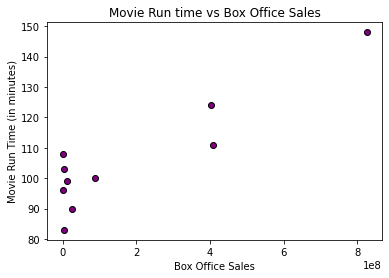

In [17]:
# Correlate Box Office v. Run time


x_values = movie_sample["Box Office"]
y_values = movie_sample["runtimeMinutes"]
plt.xlabel("Box Office Sales")
plt.ylabel("Movie Run Time (in minutes)")
plt.title("Movie Run time vs Box Office Sales")
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors="black")

plt.show()


The r-value is: 0.8275938884482791


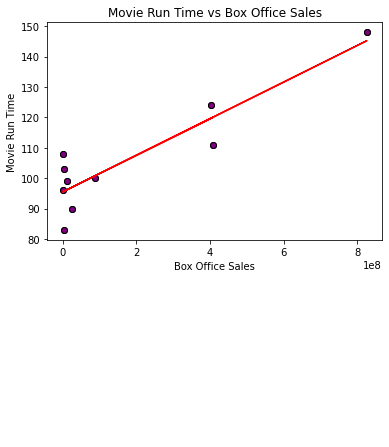

In [19]:
x_values = movie_sample["Box Office"]
y_values = movie_sample["runtimeMinutes"]
plt.xlabel("Box Office Sales")
plt.ylabel("Movie Run Time (in minutes)")
plt.title("Movie Run Time vs Box Office Sales")
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="purple", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Box Office Sales")
plt.ylabel("Movie Run Time")
plt.title("Movie Run Time vs Box Office Sales")
plt.annotate(line_eq,(8,130),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")


plt.show()

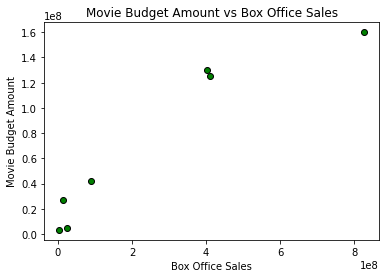

In [20]:
# Correlate Box Office v. Budget

x_values = movie_sample["Box Office"]
y_values = movie_sample["Budget"]
plt.xlabel("Box Office Sales")
plt.ylabel("Movie Budget Amount")
plt.title("Movie Budget Amount vs Box Office Sales")
plt.scatter(x_values, y_values, marker = "o", facecolors = "green", edgecolors="black")

plt.show()




The r-value is: nan


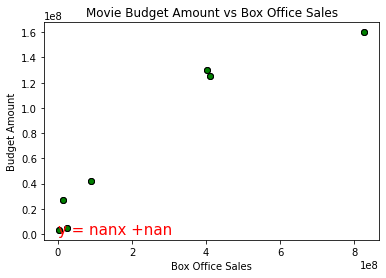

In [21]:
x_values = movie_sample["Box Office"]
y_values = movie_sample["Budget"]
plt.xlabel("Box Office Sales")
plt.ylabel("Movie Budget Amount")
plt.title("Movie Budget Amount vs Box Office Sales")
plt.scatter(x_values, y_values, marker = "o", facecolors = "green", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Box Office Sales")
plt.ylabel("Budget Amount")
plt.title("Movie Budget Amount vs Box Office Sales")
plt.annotate(line_eq,(4,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")


plt.show()

#### Conclusion/Segway
Conclusios about MPAA Rating analysis
Box Office vs. Critical Review's (Phillips' stuff)


### Philips' Code Goes Here

## Box Office vs. Critical Reviews 
In completing the box critica reviews we had the following considerations....
and face certain issues in cleaning the data, etc. etc. ...

In [23]:
movie_sample

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,movieId,imdbId,tmdbId,randomNumber,Budget,Box Office,Rated,Metascore,IMDB Rating,IMDB Votes,Rotten Tomatoes
0,tt6768578,Dogman,Dogman,2018,103,"Crime,Drama,Thriller",188675,6768578,483184.0,0.000094,NaN,5080147,Not Rated,71.0,7.2,24554.0,84.0
1,tt1637706,Our Idiot Brother,Our Idiot Brother,2011,90,"Comedy,Drama",88672,1637706,59968.0,0.000106,5000000.0,24816118,R,60.0,6.4,86111.0,70.0
2,tt1486185,Red Riding Hood,Red Riding Hood,2011,100,"Fantasy,Horror,Mystery",85397,1486185,49730.0,0.000177,42000000.0,89162162,PG-13,29.0,5.5,110023.0,10.0
3,tt1373243,Tarif Novogodniy,Tarif Novogodniy,2008,83,"Comedy,Fantasy,Romance",171549,1373243,50530.0,0.000196,3200000.0,3877492,N/A,NaN,6.3,662.0,NaN
4,tt0337879,Blackball,Blackball,2003,96,"Comedy,Drama,Sport",32128,337879,15443.0,0.000279,NaN,48000,R,NaN,5.6,4113.0,41.0
5,tt1375666,Inception,Inception,2010,148,"Action,Adventure,Sci-Fi",79132,1375666,27205.0,0.000520,160000000.0,825532764,PG-13,74.0,8.8,2168803.0,87.0
6,tt9795368,Conquest,Tobol,2019,108,"Action,Drama,History",203984,9795368,520552.0,0.000625,NaN,1964806,TV-14,NaN,5.9,1096.0,NaN
7,tt1446714,Prometheus,Prometheus,2012,124,"Adventure,Mystery,Sci-Fi",94864,1446714,70981.0,0.000683,130000000.0,403170142,R,64.0,7.0,584095.0,73.0
8,tt2345759,The Mummy,The Mummy,2017,111,"Action,Adventure,Fantasy",170827,2345759,282035.0,0.000741,125000000.0,409231607,PG-13,34.0,5.4,179540.0,16.0
9,tt0324127,Suspect Zero,Suspect Zero,2004,99,"Crime,Horror,Mystery",8831,324127,8080.0,0.000744,27000000.0,13000000,R,37.0,5.8,19441.0,18.0


In [24]:
#Correlate Box Office v. Metascore

#Plot out Box Office versus Metascore
x_values = movie_sample["Box Office"]
y_values = movie_sample["Metascore"]

plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", edgecolors="black")
plt.xlabel("Box Office Sales")
plt.ylabel("Metascore")
plt.title("Box Office Sales vs. Metascore")

plt.show()


KeyError: 'box office'

In [ ]:
#Add the linear regression equation and line to plot
x_values = movie_sample["Box Office"]
y_values = movie_sammple["Metascore"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Box Office Sales")
plt.ylabel("Metascore")
plt.title("Box Office Sales vs. Metascore")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()


In [ ]:
#Correlate Box Office v. Rotten Tomatoes Score

#Plot out box office versus user reviews
x_values = movie_sample["Box Office"]
y_values = movie_sample["Rotten Tomatoes"]

plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", edgecolors="black")
plt.xlabel("Box Office Sales")
plt.ylabel("Rotten Tomatoes Score")
plt.title("Box Office Sales vs. Rotten Tomatoes Score")

plt.show()


In [ ]:
#Add the linear regression equation and line to plot
x_values = movie_sample["Box Office"]
y_values = movie_sample["Rotten Tomatoes"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Box Office Sales")
plt.ylabel("Rotten Tomatoes Score")
plt.title("Box Office Sales vs. Rotten Tomatoes Score")

plt.annotate(line_eq,(10,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.show()


#### Conclusion/Segway
Conclusios with  with Critical & User reviews analysis
Segway to Awards / Nominations (Jim's Stuff).




### Jim's Correlation Section Goes Here

## Box Office vs. Awards / Nominations
In completing the box office vs. awards / nominations we had the following considerations....
and face certain issues in cleaning the data, etc. etc. ...

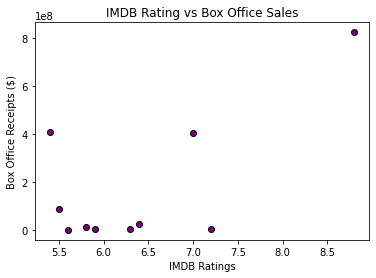

In [26]:
# Correlate Box Office v. IMDB Ratings

x_values = movie_sample["IMDB Rating"]
y_values = movie_sample["Box Office"]
plt.xlabel("IMDB Ratings")
plt.ylabel("Box Office Sales 100M($)")
plt.title("IMDB Rating vs Box Office Sales")
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors="black")

plt.show()


In [ ]:
# Do linear Regression and plot

x_values = movie_sample["IMDB Rating"]
y_values = movie_sample["Box Office"]
plt.xlabel("IMDB Ratings")
plt.ylabel("Box Office Receipts ($)")
plt.title("IMDB Rating vs Box Office Sales")
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="purple", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("IMDB Rating (ratings from 0 to 10)")
plt.ylabel("Box Office Sales, $100M")
plt.title("IMDB Rating vs Box Office Receipts")
plt.annotate(line_eq,(5.5,800000000),fontsize=12,color="red")


print(f"The r-value is: {rvalue**2}")


plt.show()

In [ ]:
# Correlate Box Office v. IMDB Votes

x_values = movie_sample["IMDB Votes"]
y_values = movie_sample["Box Office"]
plt.xlabel("IMDB Votes 100K")
plt.xticks(rotation=45)
plt.ylabel("Box Office Sales 100M ($)")
plt.title("IMBD Votes vs Box Office Sales")
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors="black")

plt.show()



In [ ]:
# Do linear Regression and plot

x_values = movie_sample["IMDB Votes"]
y_values = movie_sample["Box Office"]
plt.xlabel("IMDB Votes")
plt.xticks(rotation=45)
plt.ylabel("Box Office Receipts ($)")
plt.title("IMBD Votes vs Box Office Sales")
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="purple", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("IMDB Votes)")
plt.ylabel("Box Office Sales 100M")
plt.title("IMDB Votes vs Box Office Receipts")
plt.annotate(line_eq,(50000,500000),fontsize=10,color="red")


print(f"The r-value is: {rvalue**2}")


plt.show()

#### Conclusion/Segway
Conclusios with  with Awards/Nominations analysis
Segway linear regression to T-testing final variables.

## Steve's T-test (Chi Square? ANOVA?)
I looked at movie genres & MPAA ratings.  With genres we look at 
correlations across cataegories and thus performed a different analysis
that linear regression correlations...

In [63]:
# option: Steve performs t-test across movie genre 

genreRaw = omdb_api_df["genres"].unique()
genreList = []

for x in genreRaw:
    genres = x.split(",")
    
    for y in genres:
        if not y in genreList:
            genreList.append(y)

genreList


['Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Fantasy',
 'Horror',
 'Mystery',
 'Romance',
 'Sport',
 'Action',
 'Adventure',
 'Sci-Fi',
 'History',
 'Family',
 'Biography',
 'Documentary',
 'Animation',
 'Music',
 'War',
 'Western',
 'Musical']

In [64]:
genreSeries = pd.Series(genreList)

genreDictionary = {genre: [] for genre in genreSeries}

for index, row in movie_sample.iterrows():
    for movieGenre in genreList:
        if movieGenre in row["genres"]:
            genreDictionary[movieGenre].append(row["Box Office"])
        else:
            pass

genreDictionary

{'Crime': [5080147,
  13000000,
  50871113,
  52659594,
  31600000,
  2636637,
  178471,
  5218973,
  371528,
  2106557,
  1162422,
  85416905,
  3453043,
  18850674,
  342463063,
  56681566,
  29381649,
  57777106,
  147845033,
  30718107,
  10629321,
  80000000,
  14397593,
  4900000,
  82800000,
  40400,
  5101756,
  144008,
  2000000,
  102952888,
  12000000,
  12371132,
  318155,
  23081726,
  155760117,
  9200000,
  414404,
  1404,
  4633668,
  56308881,
  214104620,
  109421911,
  130293714,
  18000000,
  12000000,
  276891,
  3736775,
  18000000,
  27975429,
  16136,
  243347,
  1102000,
  171539887,
  449681,
  41637263,
  5507396,
  3142154,
  1297401,
  2200000,
  18381890,
  95226116,
  73121,
  7766240,
  1954937,
  6732980,
  24261569,
  15478800,
  11480000,
  5169755,
  1037335,
  34266564,
  25345000,
  532269,
  36586,
  37500,
  371396,
  34533783,
  33856058,
  188441614,
  5900000,
  200242,
  59000,
  14946150,
  43880,
  310827,
  3696232,
  2500000,
  69564,
  4

#### Conclusion/Segway
Conclusions of genre and MPAA analysis
Segway to project conclusion

## Project Conclusion
In completing the box office vs. awards / nominations we had the following considerations....
and face certain issues in cleaning the data, etc. etc. ...